In [2]:
import urllib.request as req
import cv2
import matplotlib.pyplot as plt

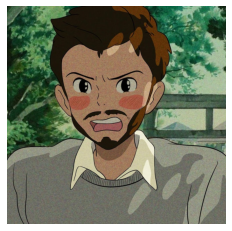

In [3]:
filepath = '38.jpg'
img = cv2.imread(filepath) # 이미지를 숫자로 변경
plt.axis('off') # axis 출력 끄기(눈금자 끄기)
# openCV BGR(파녹빨) 인 반면 matplotlib RGB(빨녹파) 순서
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

In [4]:
# 캐스케이스 파일 지정해서 검출기 생성하기
# openCV는 haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴요소 DB)를 사용해 눈, 코, 입과 같은 요소의 위치 관계를 확인하고
# 얼굴인지 확인(정면, 웃는얼굴, 눈, 몸, 전체 검출 등 다양한 캐스케이스 파일)
# http://github.com/opencv/opencv/tree/master/data/haarcascades

cascade_file = 'haarcascade_frontalface_alt.xml' # 캐스케이드 파일, 정면얼굴에 대한 DB
# cascade_file = '‪C:\Users\kcc\haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file) # 얼굴 검출기에다가 DB를 입력해서 자동분류처리

# 이미지를 읽어 들이고 그레이스케일로 변환하기( 명암 패턴을 결합해 얼굴 형태 확인 )
filepath = '38.jpg'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray)

[[ 26  22  22 ...  28  24  20]
 [ 28  27  28 ...  28  33  37]
 [ 28  29  31 ...  41  45  49]
 ...
 [104 104 104 ... 113 111 109]
 [ 99 100 103 ... 112 107 105]
 [ 99 101 104 ... 111 105 103]]


In [5]:
# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150)) # 그레이스케일 한 이미지로 얼굴 인
# print(face_list)
#결과 확인하기
if len(face_list)==0:
 print('얼굴 인식 실패')
 quit()

#인식한 부분 표시하기 --(*5)
for (x,y,w,h) in face_list:
 print("얼굴의 좌표=",x,y,w,h)
 yellow = (0,255,255)
 cv2.rectangle(img, (x,y), (x+w, y+h), yellow, thickness=7)

얼굴 인식 실패


In [1]:
#이미지 출력하기
cv2.imwrite("face-detect38.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()